1. Importations des bibliothèques

In [34]:
# Librairies de base
import pandas as pd
import numpy as np

# Librairies de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

2. Chargement des données

In [35]:
# Chargement du CSV local
df = pd.read_csv("../data/train.csv")


3. Garder uniquement les variables (features numériques)

In [36]:
df.describe(include=['number'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
features=df.describe(include=['number']).columns
features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
df = df[features]
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [39]:
df.shape

(1460, 38)

4. Supprimer les lignes ayant des valeurs manquantes

In [40]:
df = df.dropna()
df.shape

(1121, 38)

4.1. Keep Only most correlated features with target

In [41]:
y = df["SalePrice"]
features_sorted=df.corr().iloc[:,-1].abs().sort_values()[::-1][1:]
X=df.loc[:,features_sorted[features_sorted>0.5].index]

In [42]:
# X = df.drop("SalePrice", axis=1)
# y = df["SalePrice"]


6. Diviser le dataset en train (X_train, y_train) et test (X_test,y_test)

- Afin de garantir la représentativité, on devrait appliquer la stratification dans train_test_split !
- Or dans un problème de régression, la variable cible est continue réelle !!
- Ainsi, une bonne pratique consiste à appliquer la stratification par binning sur la variable cible
- L'idée de binning consiste à discrétiser la variable cible `y` de telle manoière que la distribution sur K quantiles soit uniforme.
- Ainsi, cette discrétisation génère un vecteur discrétisé `y_binned` à partir de `y`
- Ce vecteur une valeur discrète (équivalente à une classe) à chaque individu et cette classe décrit la classe de la valeur
- Si `y_binned` est discrétisé en K=10 intervalles (bins), chaque intervalle (bin) a le même nombre d'occurence

5.1. Discrétisation des valeurs cibles en utilisant Binning

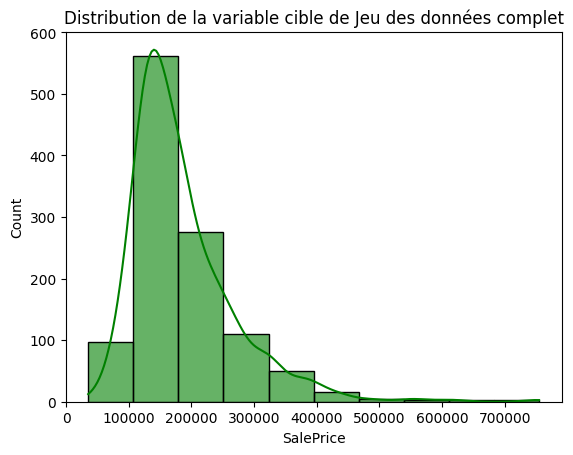

In [43]:
# Visualsier la distribution de la variable cible y

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(
    y, 
    label="Distribution de la variable cible de Jeu des données complet", 
    color='green', 
    kde=True,  # Ajout de la courbe de densité
    alpha=0.6, # Transparence pour voir la superposition
    bins=10,
    binrange=(y.min(), y.max())
)
plt.title("Distribution de la variable cible de Jeu des données complet")
plt.show()

In [44]:
# Discrétiser les valeurs cibles de y en K (10 par exemple) intervalles basés sur les quantiles
y_binned = pd.qcut(y, q=10, labels=False, duplicates='drop')

C:\Users\aykad\AppData\Local\Temp\ipykernel_19192\3394278836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_binned, palette='viridis')


<Axes: xlabel='SalePrice', ylabel='count'>

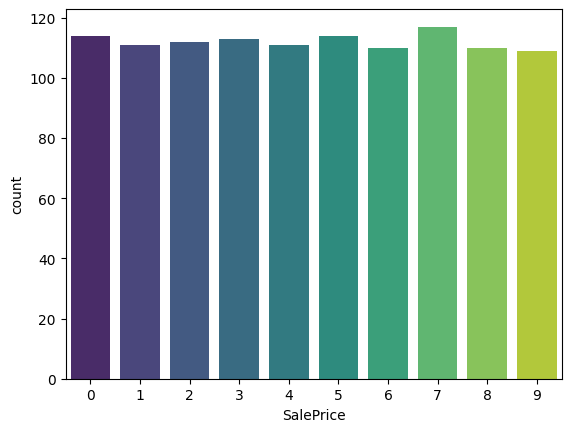

In [45]:
# Visualiser la distribution de K valeurs discrètes dans y_binned
# vérifier que sa distribution est uniforme !!
sns.countplot(x=y_binned, palette='viridis')

5.2. Diviser le jeu des données en aplliquant la startification par binning

In [46]:
# Diviser les données en appliquant la stratéfication par binning et utiliser y_binned
# Ceci garantit que la distribution initiale des valeurs de y est préservée dans y_train et y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y_binned)

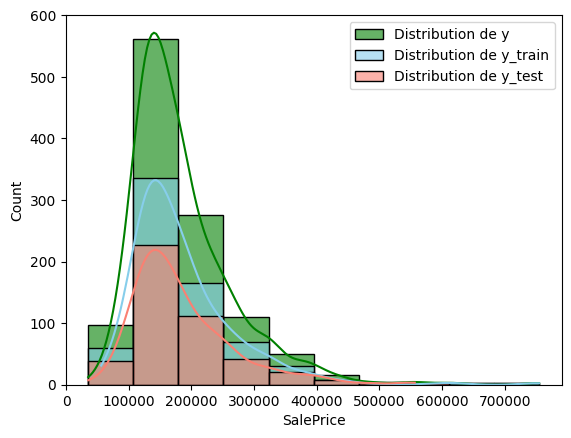

In [47]:
# Visualsier et vérifier que la distribution initiale des valeurs de y est préservée dans y_train et y_test
sns.histplot(
    y, 
    label="Distribution de y", 
    color='green', 
    kde=True,  # Ajout de la courbe de densité
    alpha=0.6, # Transparence pour voir la superposition
    bins=10,
    binrange=(y.min(), y.max())
)
sns.histplot(
    y_train, 
    label='Distribution de y_train', 
    color='skyblue', 
    kde=True,  # Ajout de la courbe de densité
    alpha=0.6, # Transparence pour voir la superposition
    bins=10,
    binrange=(y.min(), y.max())
)
sns.histplot(
    y_test, 
    label='Distribution de y_test', 
    color='salmon', 
    kde=True,  # Ajout de la courbe de densité
    alpha=0.6,
    bins=10,
    binrange=(y.min(), y.max())
)
plt.legend()
plt.show()

6. Entraînement du modèle

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


7. Évaluation du modèle

In [49]:
y_train_pred = model.predict(X_train)
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R2:", r2_score(y_train, y_train_pred))

Train RMSE: 38691.72265998852
Train R2: 0.7883085996772924


In [50]:
y_test_pred = model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R2:", r2_score(y_test, y_test_pred))


Test RMSE: 44208.9196591863
Test R2: 0.7038527876225604


7. Sauvegarde du modèle

In [51]:
with open("../models/model.pkl", "wb") as f:
    pickle.dump(model, f)

⚠️ Le fichier model.pkl est stocké localement sans aucun suivi de version.